In [9]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler # Z-score variables
from sklearn.preprocessing import MinMaxScaler # Min-Max Normalization

from sklearn.model_selection import train_test_split # simple TT split cv

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [10]:
# importing sub 1 box select data
sub_I_13_3_box_select_DF = pd.read_csv("/Users/iman/CPSC_Courses/CPSC392ParlettPelleriti/Research/Data/Sub13_2/Instructional/session_I_PanRight_subjID_13_06-12-23_03-31-43.csv")
sub_I_13_3_box_select_DF.drop(sub_I_13_3_box_select_DF[(sub_I_13_3_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_13_3_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_13_3_box_select_DF.insert(0, 'participant_num', 13)
sub_I_13_3_box_select_DF.head()

,participant_num,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,...,object_type,object_translation_x,object_translation_y,object_translation_z,object_rotation_x,object_rotation_y,object_rotation_z,object_rotation_w,activity,Unnamed: 47
126,13,21.930035,15:31:45:690,1,0,0.554,0.0,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,13,21.942999,15:31:45:704,1,0,1.000,0.0,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,13,21.957050,15:31:45:718,1,0,1.000,0.0,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,13,21.970987,15:31:45:731,1,0,1.000,0.0,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,13,21.984673,15:31:45:746,1,0,1.000,0.0,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# importing sub 1 box select data
sub_I_20_1_box_select_DF = pd.read_csv("/Users/iman/CPSC_Courses/CPSC392ParlettPelleriti/Research/Data/Sub20/Instructional/session_I_PanRight_subjID_20_06-12-23_02-49-28.csv")
sub_I_20_1_box_select_DF.drop(sub_I_20_1_box_select_DF[(sub_I_20_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_20_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_20_1_box_select_DF.insert(0, 'participant_num', 20)
sub_I_20_1_box_select_DF.head()

,participant_num,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,...,object_type,object_translation_x,object_translation_y,object_translation_z,object_rotation_x,object_rotation_y,object_rotation_z,object_rotation_w,activity,Unnamed: 47
655,20,55.108662,14:49:37:586,0,1,0,0.397,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
656,20,55.119194,14:49:37:596,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,20,55.132957,14:49:37:610,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
658,20,55.146973,14:49:37:624,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
659,20,55.160469,14:49:37:637,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
all_sub_box_select_DF = pd.concat([sub_I_13_3_box_select_DF, sub_I_20_1_box_select_DF])

In [13]:
print(sub_I_13_3_box_select_DF.shape)
print(sub_I_20_1_box_select_DF.shape)
print(all_sub_box_select_DF.shape)

(291, 49)
(400, 49)
(691, 49)


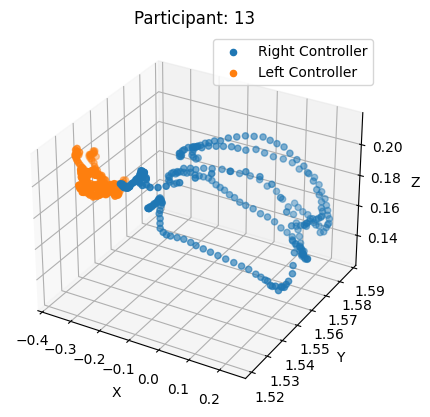

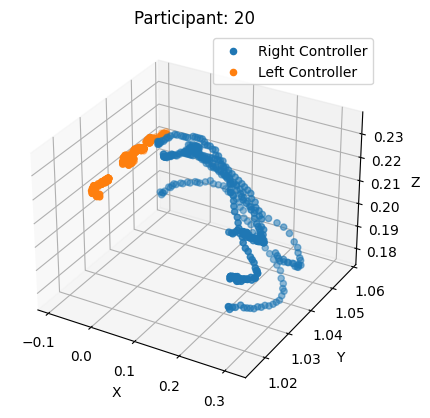

In [14]:
grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Participant: {participant_num}')
    ax.legend()
    plt.show()

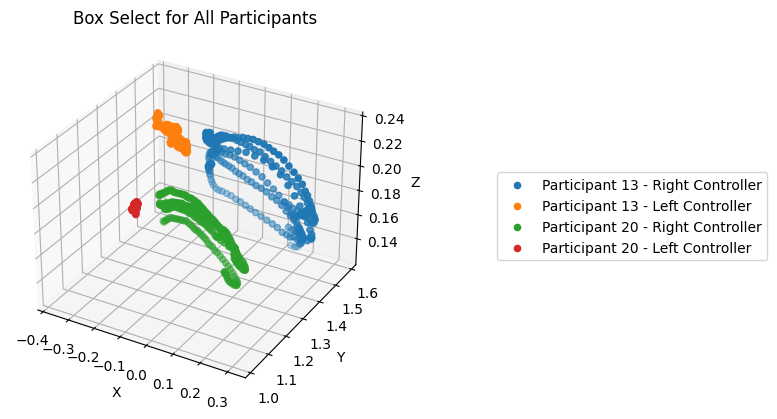

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label=f'Participant {participant_num} - Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label=f'Participant {participant_num} - Left Controller')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Box Select for All Participants')
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [16]:
# only counter variables in dataframe
counter = ["participant_num", "time", "absolute_time", "left_handed", "right_handed", "trigger_pull_amount_left", "trigger_pull_amount_right", "gesture_counter_UI", "x_pressed", "x_counter", "gesture_counter"]
all_sub_box_select_DF_counter = all_sub_box_select_DF[counter]
all_sub_box_select_DF_counter.head()

,participant_num,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter
126,13,21.930035,15:31:45:690,1,0,0.554,0.0,1,False,0,1
127,13,21.942999,15:31:45:704,1,0,1.000,0.0,1,False,0,1
128,13,21.957050,15:31:45:718,1,0,1.000,0.0,1,False,0,1
129,13,21.970987,15:31:45:731,1,0,1.000,0.0,1,False,0,1
130,13,21.984673,15:31:45:746,1,0,1.000,0.0,1,False,0,1


In [17]:
translation = ["r_controller_translation_x", "r_controller_translation_y", "r_controller_translation_z", "l_controller_translation_x", "l_controller_translation_y", "l_controller_translation_z"]
all_sub_box_select_DF_translation = all_sub_box_select_DF[translation]

In [18]:
# normalization
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(all_sub_box_select_DF_translation), columns=all_sub_box_select_DF_translation.columns)
df_normalized.head()

,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
0,0.020747,0.888112,0.770642,0.301003,0.963250,0.419355
1,0.020747,0.889860,0.761468,0.301003,0.961315,0.354839
2,0.018672,0.889860,0.752294,0.304348,0.959381,0.387097
3,0.018672,0.891608,0.743119,0.301003,0.957447,0.483871
4,0.018672,0.891608,0.733945,0.294314,0.957447,0.516129


In [19]:
all_sub_box_select_DF_counter.insert(0, 'index', range(0, 0 + len(all_sub_box_select_DF_counter)))
all_sub_box_select_DF_counter.head()

,index,participant_num,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter
126,0,13,21.930035,15:31:45:690,1,0,0.554,0.0,1,False,0,1
127,1,13,21.942999,15:31:45:704,1,0,1.000,0.0,1,False,0,1
128,2,13,21.957050,15:31:45:718,1,0,1.000,0.0,1,False,0,1
129,3,13,21.970987,15:31:45:731,1,0,1.000,0.0,1,False,0,1
130,4,13,21.984673,15:31:45:746,1,0,1.000,0.0,1,False,0,1


In [20]:
df_normalized.insert(0, 'index', range(0, 0 + len(df_normalized)))
df_normalized.head()

,index,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
0,0,0.020747,0.888112,0.770642,0.301003,0.963250,0.419355
1,1,0.020747,0.889860,0.761468,0.301003,0.961315,0.354839
2,2,0.018672,0.889860,0.752294,0.304348,0.959381,0.387097
3,3,0.018672,0.891608,0.743119,0.301003,0.957447,0.483871
4,4,0.018672,0.891608,0.733945,0.294314,0.957447,0.516129


In [21]:
merged_all_sub_box_select_DF = pd.merge(left=all_sub_box_select_DF_counter, right=df_normalized, left_on='index', right_on='index')
merged_all_sub_box_select_DF.head()

,index,participant_num,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
0,0,13,21.930035,15:31:45:690,1,0,0.554,0.0,1,False,0,1,0.020747,0.888112,0.770642,0.301003,0.963250,0.419355
1,1,13,21.942999,15:31:45:704,1,0,1.000,0.0,1,False,0,1,0.020747,0.889860,0.761468,0.301003,0.961315,0.354839
2,2,13,21.957050,15:31:45:718,1,0,1.000,0.0,1,False,0,1,0.018672,0.889860,0.752294,0.304348,0.959381,0.387097
3,3,13,21.970987,15:31:45:731,1,0,1.000,0.0,1,False,0,1,0.018672,0.891608,0.743119,0.301003,0.957447,0.483871
4,4,13,21.984673,15:31:45:746,1,0,1.000,0.0,1,False,0,1,0.018672,0.891608,0.733945,0.294314,0.957447,0.516129


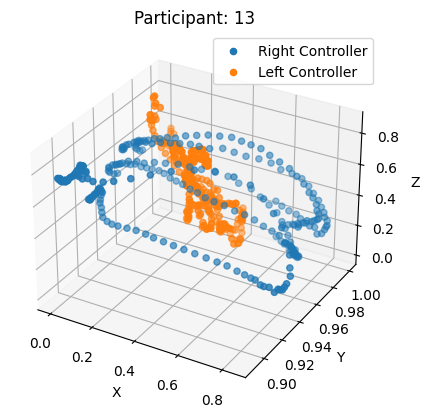

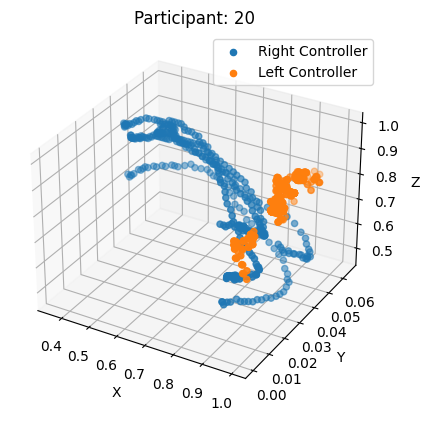

In [22]:
grouped_by_participant = merged_all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Participant: {participant_num}')
    ax.legend()
    plt.show()

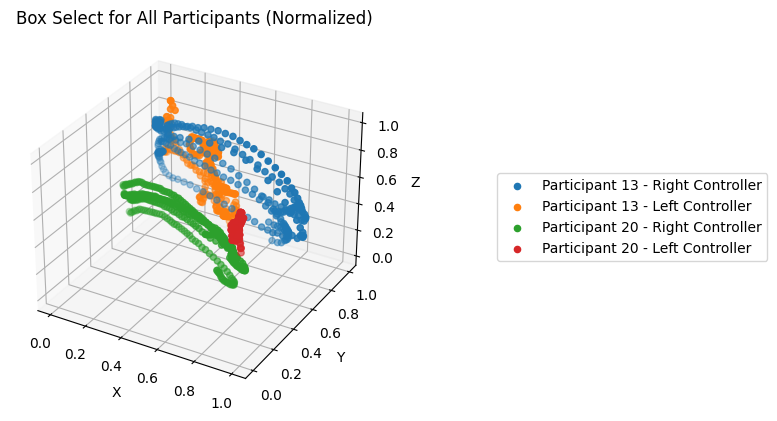

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
grouped_by_participant = merged_all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label=f'Participant {participant_num} - Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label=f'Participant {participant_num} - Left Controller')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Box Select for All Participants (Normalized)')
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

plt.show()